In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 0. Importing data

In [2]:
intensity_df = pd.read_csv("../data/intensity_data_set.csv", index_col=["Country", "Start Year"])
intensity_df.drop(columns = ["CPI"], inplace = True)
probability_df = pd.read_csv("../data/probability_data_set.csv", index_col=["Country", "Start Year"])

In [3]:
def subplots_function( df, var_list, index, aggregation_funct, graph_rows =2, figure_size=  (20, 18) ,subplot_title_fontsize= 14):
    fig, axs = plt.subplots(graph_rows,2, figsize= figure_size)

    for x in var_list:
        a = math.floor(var_list.index(x)/2)
        b = var_list.index(x)%2 
        axs[a,b].plot(df.pivot_table(values= x,  index = index, aggfunc= aggregation_funct)[x])
        axs[a,b].set_title(x, fontsize = subplot_title_fontsize)

    if ((len(var_list) % 2) != 0):
        axs[graph_rows-1,1].set_axis_off()
    
    fig.tight_layout()

# 1. Global statistics

In [4]:
intensity_sum_stats = intensity_df.describe()
probability_sum_stats = probability_df.describe()

In [8]:
#Intensity Kurtosis
kurtosis_intensity = pd.Series()

for x in intensity_sum_stats.columns:
    kurtosis_intensity[str(x)] = intensity_df[str(x)].kurt()
    
kurtosis_intensity = kurtosis_intensity.to_frame().rename(columns= {0:"kurtosis"}).transpose()


#Probabilty Kurtosis
kurtosis_probability = pd.Series()

for x in probability_sum_stats.columns:
   kurtosis_probability[str(x)] = probability_df[str(x)].kurt()
    
kurtosis_probability = kurtosis_probability.to_frame().rename(columns= {0:"kurtosis"}).transpose()

In [9]:
#Intensity Skewness
skewness_intensity = pd.Series()

for x in intensity_sum_stats.columns:
    skewness_intensity[str(x)] = intensity_df[str(x)].skew()
    
skewness_intensity = skewness_intensity.to_frame().rename(columns= {0:"skewness"}).transpose()

#Probability Skewness
skewness_probability = pd.Series()

for x in probability_sum_stats.columns:
   skewness_probability[str(x)] = probability_df[str(x)].skew()
    
skewness_probability = skewness_probability.to_frame().rename(columns= {0:"skewness"}).transpose()

In [11]:
intensity_sum_stats = pd.concat([intensity_sum_stats, kurtosis_intensity, skewness_intensity])
intensity_sum_stats

,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)"
count,12648.000000,5.789000e+03,7.163000e+03,1.322000e+03,1.167300e+04,3.300000e+01,3.300000e+01,6.950000e+02,6.940000e+02,3.126000e+03,3.111000e+03
mean,136.005614,1.268419e+03,6.368553e+05,3.182190e+04,3.950318e+05,5.687264e+06,6.357118e+06,1.291425e+06,1.699765e+06,1.127098e+06,1.471953e+06
std,3089.186260,2.638675e+04,6.798133e+06,2.152175e+05,5.335635e+06,1.745232e+07,1.760343e+07,4.578385e+06,5.954430e+06,6.237979e+06,8.311406e+06
min,0.000000,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,8.400000e+01,1.310000e+02,3.400000e+01,4.800000e+01,0.000000e+00,0.000000e+00
25%,9.000000,1.000000e+01,6.000000e+02,3.485000e+02,4.000000e+01,1.000000e+05,1.000000e+05,7.400000e+04,9.917050e+04,1.500000e+04,2.123400e+04
50%,16.000000,2.500000e+01,6.356000e+03,2.000000e+03,9.500000e+02,5.650000e+05,7.023360e+05,2.500000e+05,3.491245e+05,1.000000e+05,1.408780e+05
75%,32.000000,7.900000e+01,6.000000e+04,7.256500e+03,1.657300e+04,3.344000e+06,4.245383e+06,8.000000e+05,1.117445e+06,5.400000e+05,7.145890e+05
max,222570.000000,1.800000e+06,3.300000e+08,5.000000e+06,3.300000e+08,1.000000e+08,1.000000e+08,6.000000e+07,9.361435e+07,2.100000e+08,2.844652e+08
kurtosis,3185.566455,3.760481e+03,1.373964e+03,3.221571e+02,2.230595e+03,2.886180e+01,2.690789e+01,9.325282e+01,1.109667e+02,5.107478e+02,5.682550e+02
skewness,52.762253,5.688299e+01,3.281960e+01,1.644789e+01,4.179041e+01,5.236307e+00,4.996237e+00,8.766383e+00,9.297606e+00,1.938535e+01,2.059656e+01


In [12]:
probability_sum_stats = pd.concat([probability_sum_stats, kurtosis_probability, skewness_probability])
probability_sum_stats

,Drought,Earthquake,Extreme temperature,Flood,Storm,Volcanic activity,Wildfire
count,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000,2849.000000
mean,0.142506,0.233415,0.172692,1.427167,0.903475,0.044226,0.107055
std,0.363418,0.776629,0.443047,1.936776,2.003022,0.250300,0.459890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,3.000000,11.000000,3.000000,25.000000,23.000000,4.000000,8.000000
kurtosis,5.816156,39.570757,9.118377,22.974423,32.441967,57.933600,80.122792
skewness,2.437371,5.384205,2.843191,3.712676,4.988872,6.858314,7.369612


In [13]:
intensity_df

Total Deaths  No. Injured  No. Affected  No. Homeless  \
Country     Start Year                                                          
Afghanistan 2000               507.0          NaN           NaN           NaN   
            2000                16.0          NaN          11.0           NaN   
            2000                19.0          NaN        1604.0           NaN   
            2000                15.0          NaN         613.0           NaN   
            2000                40.0         40.0           NaN           NaN   
...                              ...          ...           ...           ...   
Zimbabwe    2022                 NaN          NaN        3000.0           NaN   
            2022                35.0         71.0           NaN           NaN   
            2022               750.0       6551.0           NaN           NaN   
            2023                 2.0          NaN           NaN           NaN   
            2023               108.0        963.0           NaN           NaN   

                        Total Affected  Reconstruction Costs ('000 US$)  \
Country     Start Year                                                    
Afghanistan 2000                   NaN                              NaN   
            2000                  11.0                              NaN   
            2000                1604.0                              NaN   
            2000                 613.0                              NaN   
            2000                  40.0                              NaN   
...                                ...                              ...   
Zimbabwe    2022                3000.0                              NaN   
            2022                  71.0                              NaN   
            2022                6551.0                              NaN   
            2023                   NaN                              NaN   
            2023                 963.0                              NaN   

                        Reconstruction Costs, Adjusted ('000 US$)  \
Country     Start Year                                              
Afghanistan 2000                                              NaN   
            2000                                              NaN   
            2000                                              NaN   
            2000                                              NaN   
            2000                                              NaN   
...                                                           ...   
Zimbabwe    2022                                              NaN   
            2022                                              NaN   
            2022                                              NaN   
            2023                                              NaN   
            2023                                              NaN   

                        Insured Damage ('000 US$)  \
Country     Start Year                              
Afghanistan 2000                              NaN   
            2000                              NaN   
            2000                              NaN   
            2000                              NaN   
            2000                              NaN   
...                                           ...   
Zimbabwe    2022                              NaN   
            2022                              NaN   
            2022                              NaN   
            2023                              NaN   
            2023                              NaN   

                        Insured Damage, Adjusted ('000 US$)  \
Country     Start Year                                        
Afghanistan 2000                                        NaN   
            2000                                        NaN   
            2000                                        NaN   
            2000                                        NaN   
            2000            

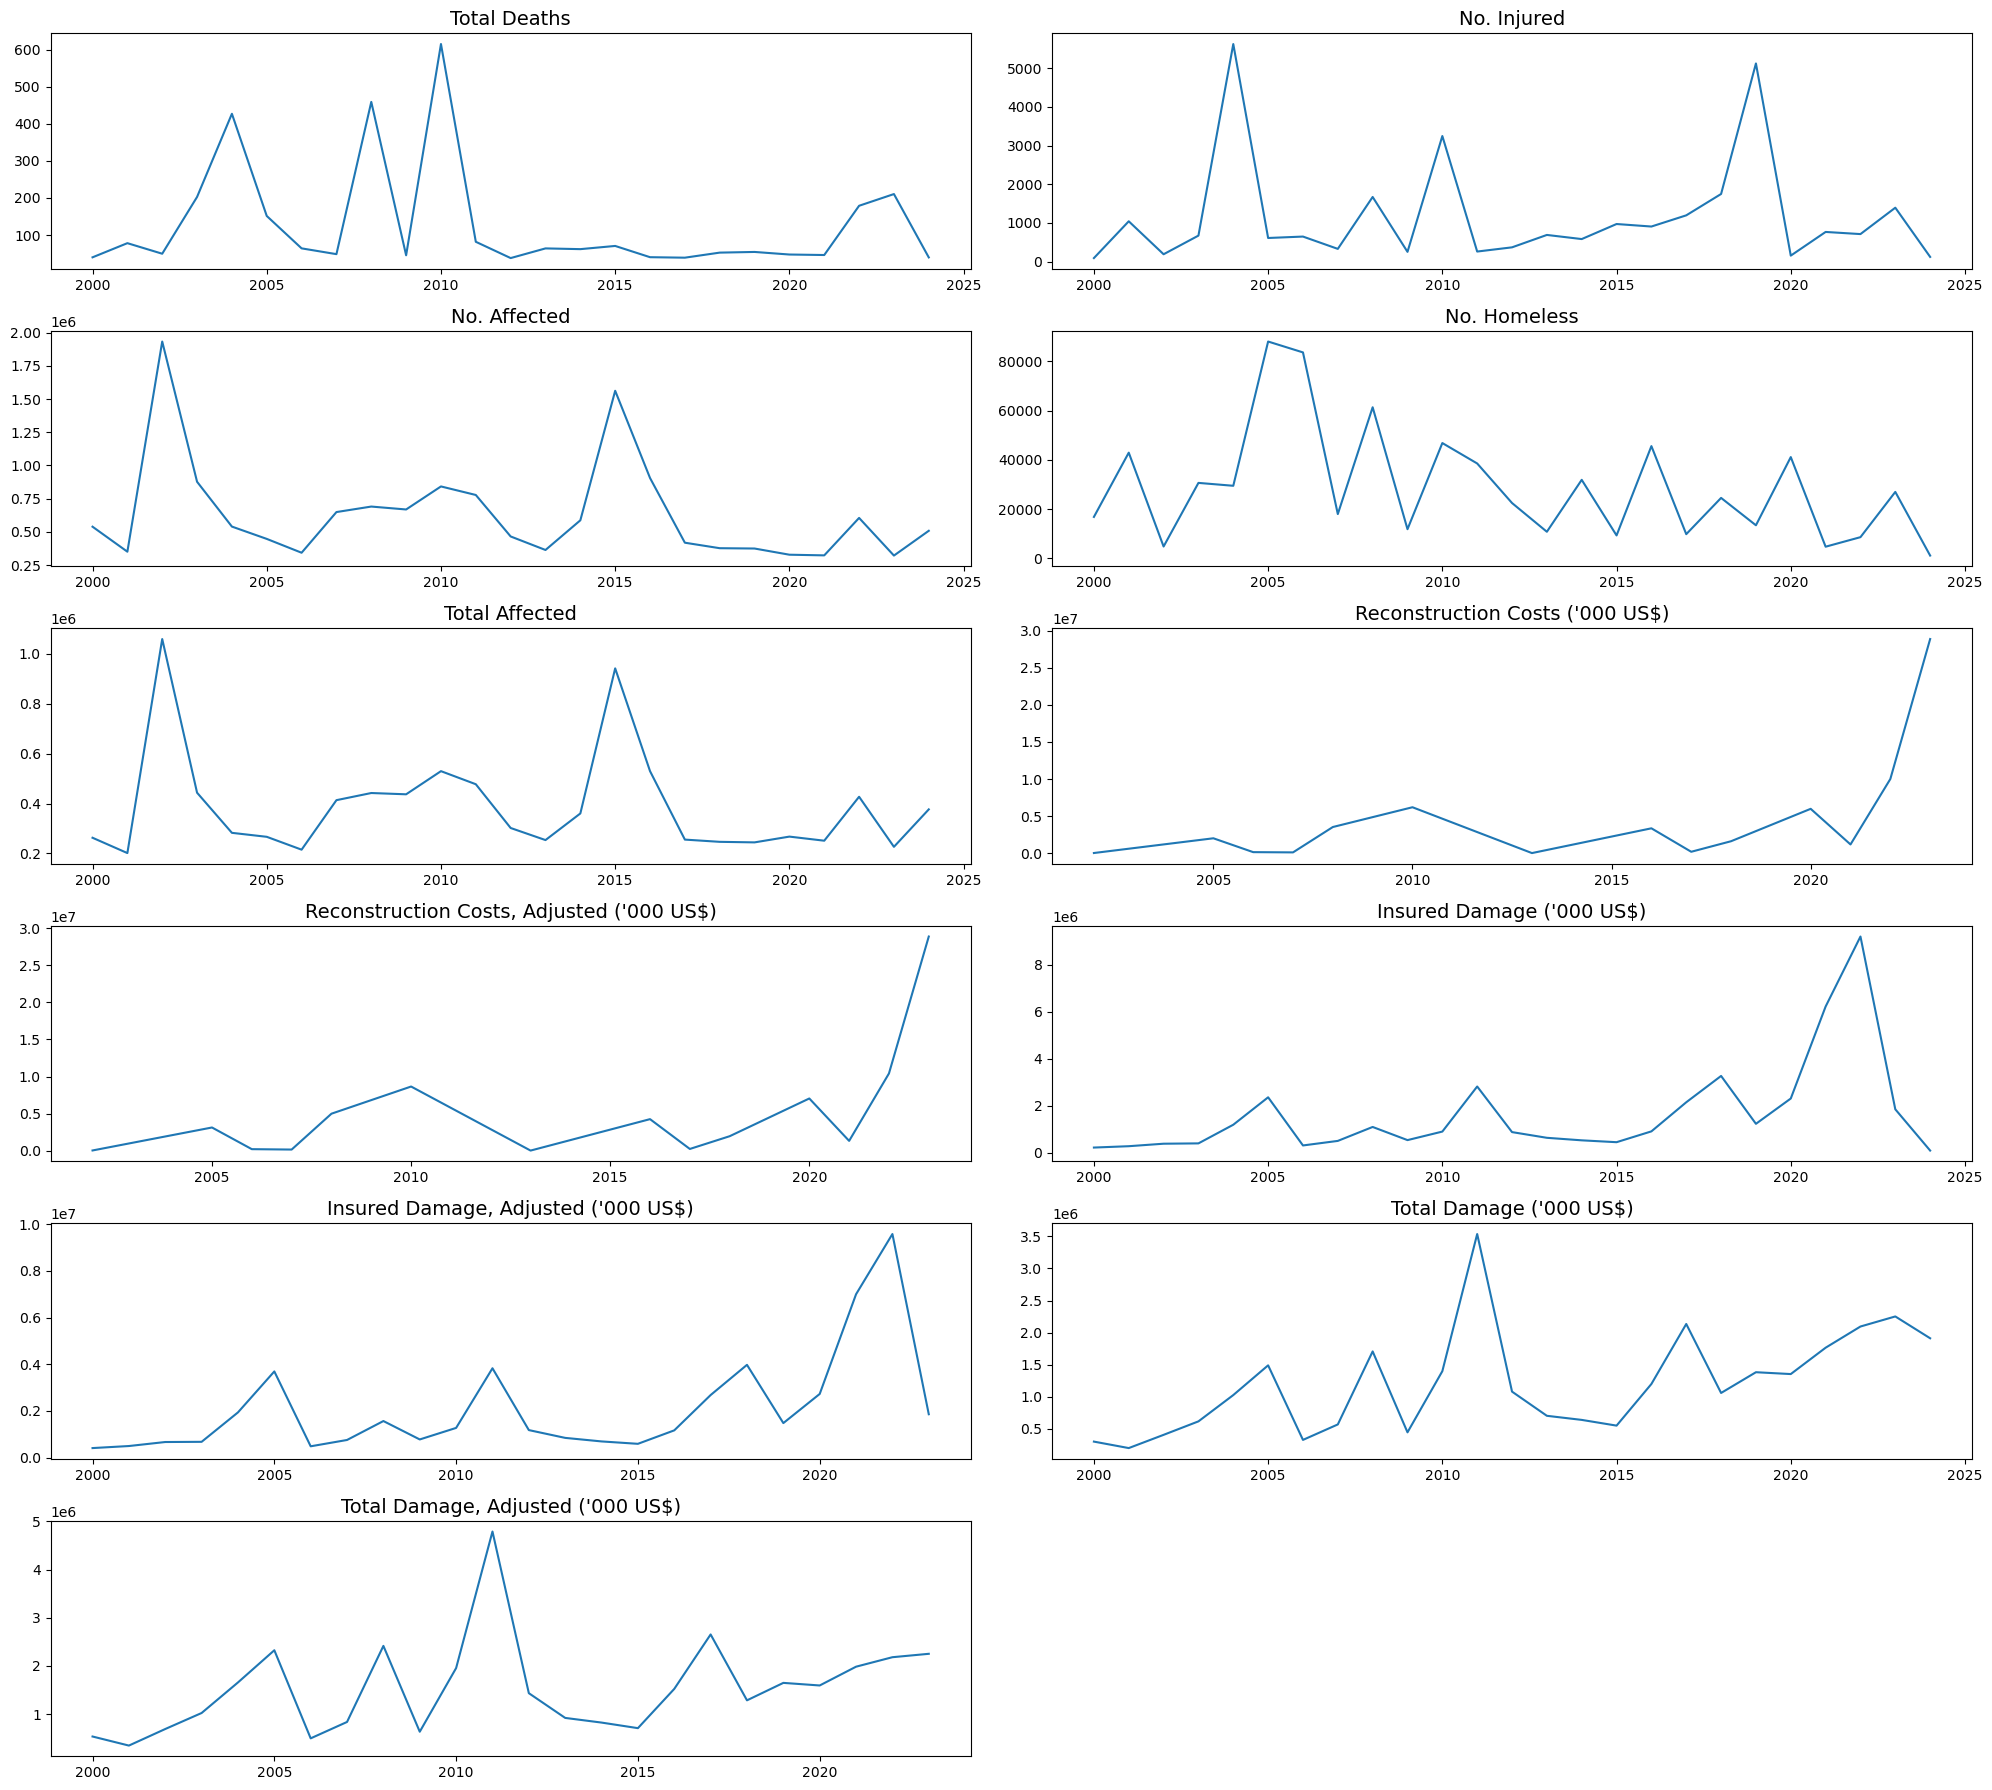

In [14]:
subplots_function( df = intensity_df, var_list = intensity_sum_stats.columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =6, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14)

In [15]:
probability_sum_stats.columns.values.tolist()

['Drought',
 'Earthquake',
 'Extreme temperature',
 'Flood',
 'Storm',
 'Volcanic activity',
 'Wildfire']

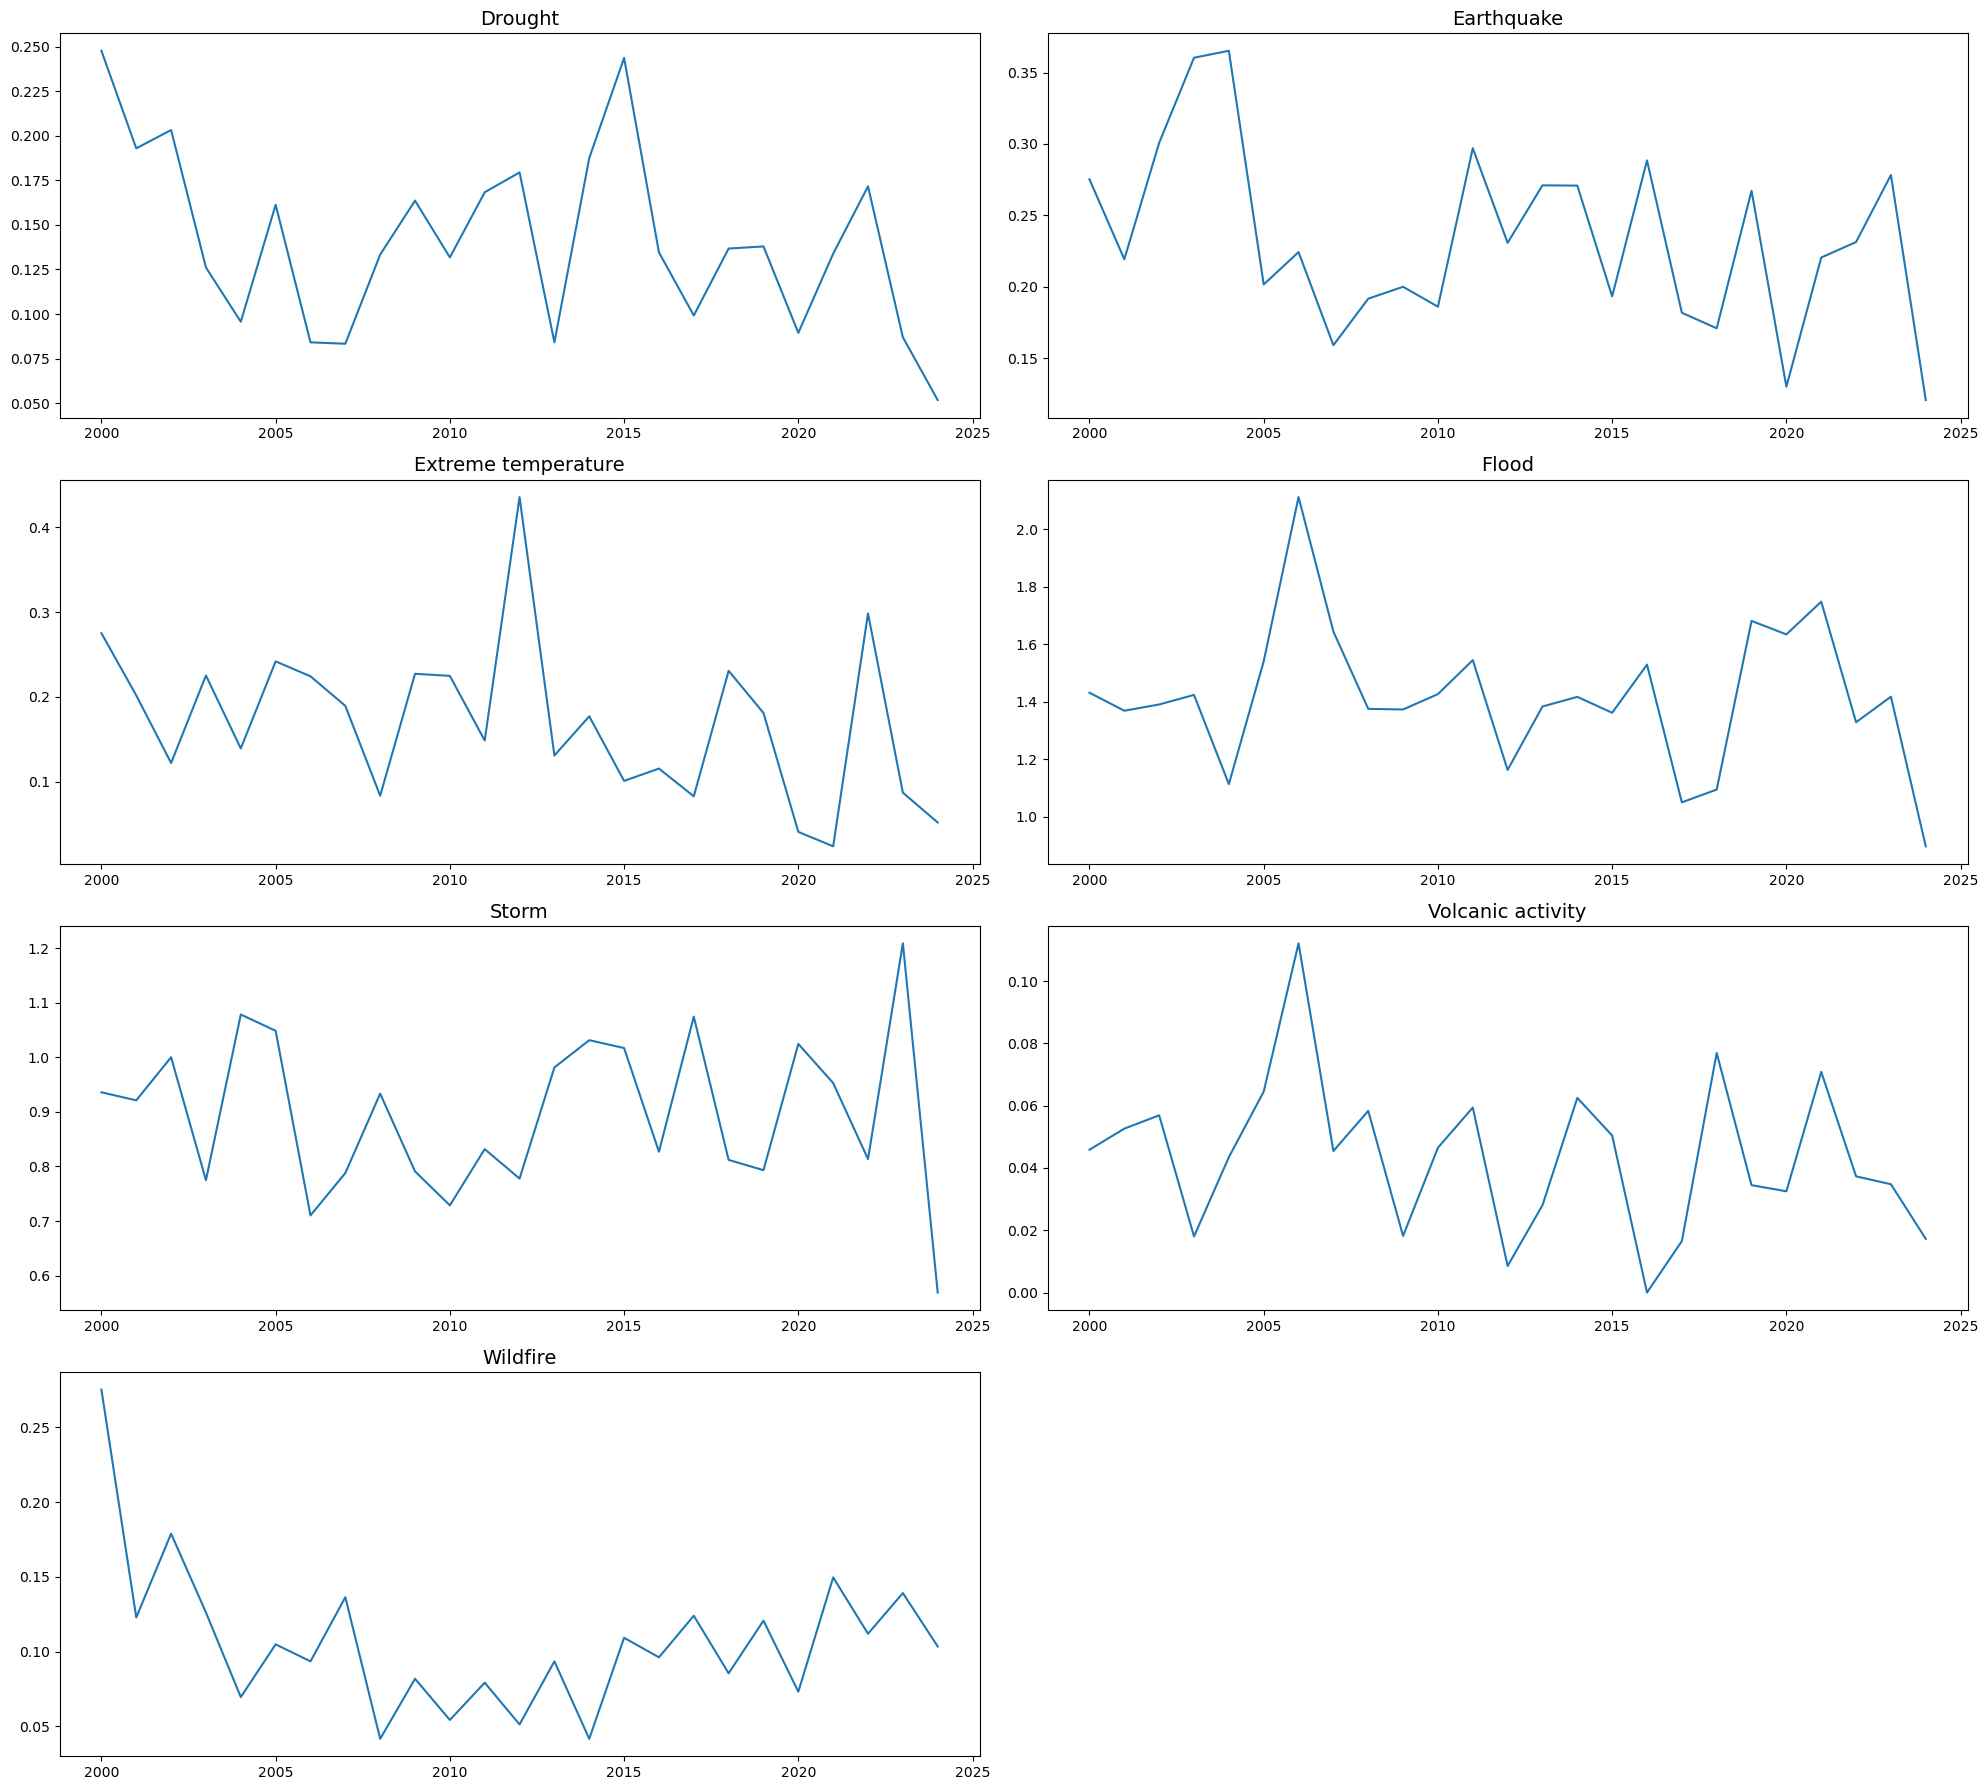

In [16]:
subplots_function( df = probability_df, var_list = probability_sum_stats.columns.values.tolist(), 
                  index = "Start Year", aggregation_funct = "mean", graph_rows =4, 
                  figure_size=  (20, 18) ,subplot_title_fontsize= 14)